<a href="https://colab.research.google.com/github/ahcamachod/clusterizacion-de-datos-segmentacion-de-clientes/blob/main/segmentos_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterización de Datos: Segmentación de clientes

En este notebook estaremos desarrollando un análisis completo de Ciencia de Datos con Machine Learning para la segmentación de clientes.

De manera puntual, emplearemos una técnica de segmentación del comportamiento del cliente basada en datos conocida como RFM (Recencia o Actualidad, Frecuencia, y Valor Monetario).

El dataset utilizado fue adaptado para nuestro entrenamiento, tomando como referencia un dataset de Kaggle llamado **Brazilian E-Commerce Public Dataset by Olist**.

*dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce*

## Aula 1

### 1.2 Importando y explorando el dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
path_file = '/content/drive/MyDrive/Colab Notebooks/231127-1_clusterizacion_datos_segmentacion_clientes/datasets/e_commerce.csv'
datos_compras_clientes_df = pd.read_csv(path_file)

In [ ]:
datos_compras_clientes_df.sample(5)

,muestra,id_cliente,id_unico_cliente,item_id,cp_cliente,ciudad_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,precio_envio,pago_secuencial,pago_tipo,pago_cuotas,pago_valor,review,categoria,cp_vendedor,ciudad_vendedor,estado_vendedor
38011,38011,e1d014e36903719545d5fa13d6ef3ac7,c7385f3ffee80bfbd168b56103746946,1,23090,medellin,ANT,245ddaef16302f47bdda5b7549ea20fe,entregado,2018-04-10 17:48:41,...,15.37,1,credito,2,85.36,4,automotivo,6871,bogota,DC
60407,60407,d62ea309fcc28ec855324d8055ce2aea,5ab77444956339264bcff5c82ed85f22,1,4311,bogota,DC,39abbbed01c79f6b367a56bf5905da34,entregado,2017-07-14 15:51:06,...,7.78,1,credito,4,40.77,3,telefonia_fija,8250,bogota,DC
65026,65026,6b1ba959402bb8fb18cff99159492645,cd52ca09554e5cc34d9ec28d230008af,1,89074,manizales,CAL,e062101a12bfc5d6a96a98ed8282a567,entregado,2018-03-21 09:40:36,...,18.23,1,factura,1,63.22,5,bebes,90010,manizales,CAL
50207,50207,bb02dc516c4e37f003e8e802369a3a66,b30692588e0b7db33f62aa7325755458,1,13056,bogota,DC,30524d6f42cc124d17d641b49e792b87,entregado,2018-08-05 21:03:19,...,7.47,1,credito,2,37.47,1,telefonia,1319,bogota,DC
30818,30818,87601c2e5f41dbe016d4693dc1ba415a,34350f8d9be701a6645ca0bf954161fe,1,8780,bogota,DC,e32f30334d29fb3811f44538904a8517,entregado,2017-03-15 18:31:57,...,13.77,1,credito,10,183.67,5,papeleria,3470,bogota,DC


### 1.2.1 Columnas y Descripción

**muestra**: Numeración creciente de los datos.

**id_cliente**: Número de identificación del cliente que realiza la compra.

**id_unico_cliente**: Número único para cada cliente en función de su dirección IP, independiente de la compra.

**item_id**: Número de identificación del item comprado.

**cp_cliente**: Código postal del cliente.

**ciudad_cliente**: Ciudad donde se realizó el pedido.

**estado_cliente**: Estado donde se realizó el pedido.

**id_pedido**: Número de identificación de la compra.

**status_pedido**: Status del pedido (Ej. Entregado, facturado, procesando, etc).

**horario_pedido**: Fecha y hora en la cual se realizó el pedido.

**pedido_aprobado**: Fecha y hora en la cual se aprobó el pedido.  
**pedido_entregador**: Fecha y hora en la cual se hizo entrega del pedido a la empresa transportadora.  

**pedido_entregado**:Fecha y hora en la cual se hizo entrega del pedido al cliente.

**fecha_estimada**:Fecha y hora estimada de entrega.

**id_vendedor**: Número de identificación del vendedor.

**precio**: Precio del producto.

**precio_envio**: Precio del envío.

**pago_secuencial**: Compra en la cual el cliente solicita más de una forma de pago (Ej. Crédito y débito, etc).

**pago_tipo**: Método de pago (Ej. factura, débito, voucher).

**pago_cuotas**: Número de cuotas escogido por el cliente para realizar el pago.

**pago_valor**: Valor total pago.

**review**: Nota que el consumidor da a todo el proceso.

**categoria**: Categoría del item comprado.

**cp_vendedor**: Código postal del vendedor.

**ciudad_vendedor**: Ciudad del vendedor.

**estado_vendedor**: Estado del vendedor.

### 1.3 Análisis exploratorio de los datos

Definiremos una función para graficar la distribución de las variables y su respectivo valor porcentual con relación al total de registros del dataset. En esta función emplearemos varios recursos de las biblioteca matplotlib y seaborn.

In [ ]:
def plot_porcentajes(estado,datos):
    plt.figure(figsize=(20,8))
    grafico = sns.countplot(x= estado,data=datos,orient='h')
    grafico.set_ylabel('Conteo',fontsize=17)

    sizes = []

    for p in grafico.patches:
        height = p.get_height()
        sizes.append(height)
        grafico.text(p.get_x() + p.get_width()/1.6,
              height+200,
              f'{round((height/len(datos)*100),2)}%',
              ha = 'center',va='bottom',fontsize=12)

    grafico.set_ylim(0,max(sizes)*1.1)

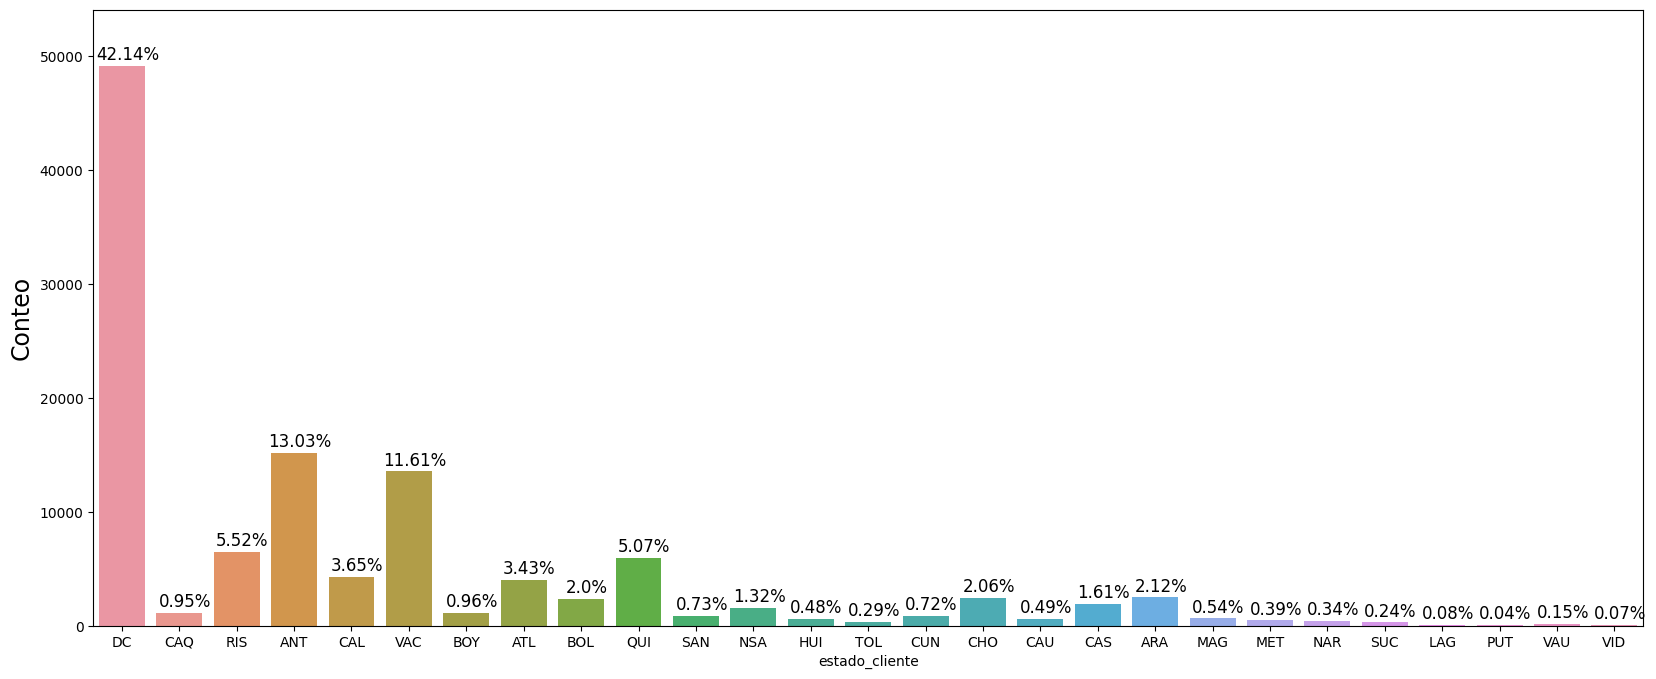

In [ ]:
#Realizaremos la gráfica de la cantidad (porcentaje) de clientes por estado/departamento/provincia
plot_porcentajes('estado_cliente',datos_compras_clientes_df)

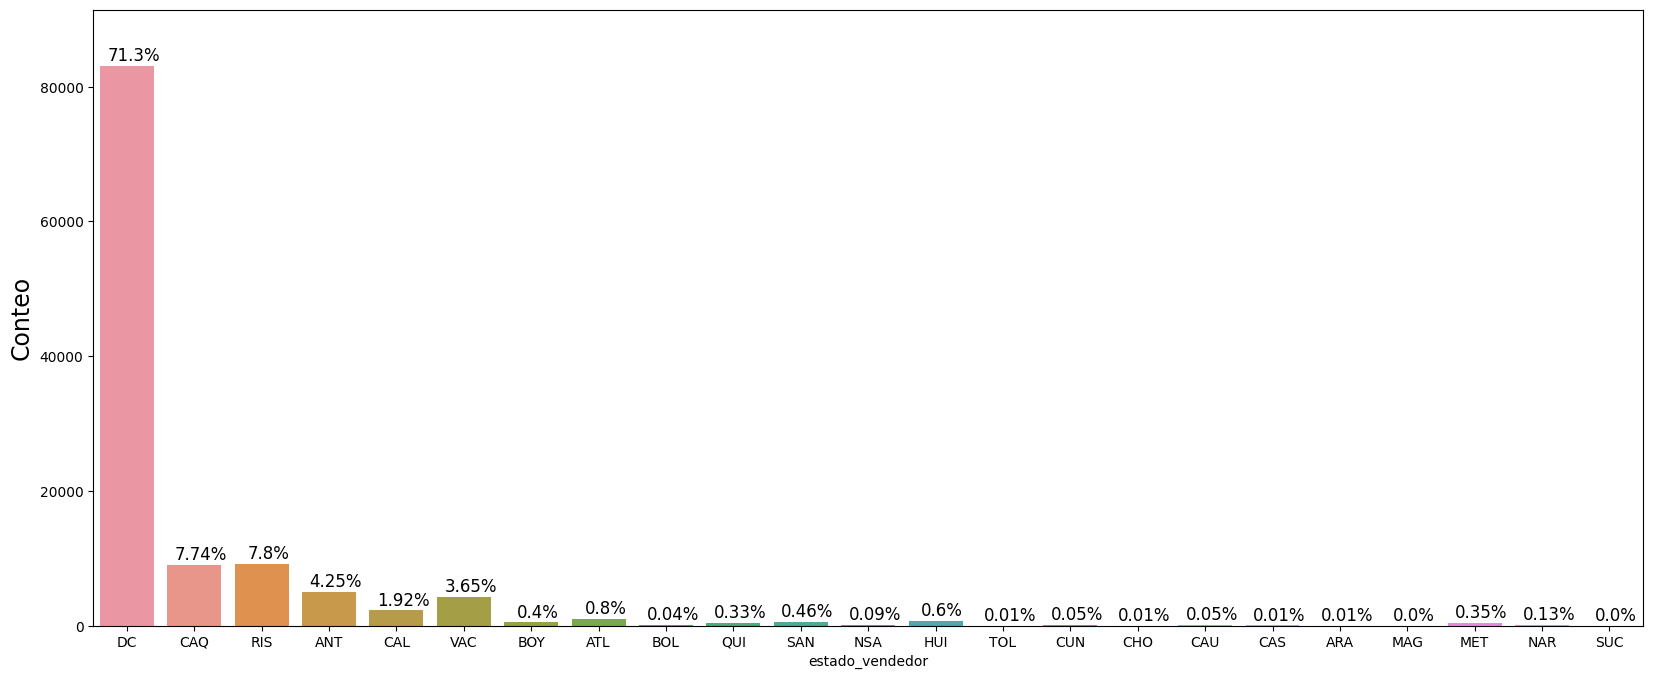

In [ ]:
#Realizaremos la gráfica de la cantidad (porcentaje)de vendedores por estado/departamento/provincia
plot_porcentajes('estado_vendedor',datos_compras_clientes_df)

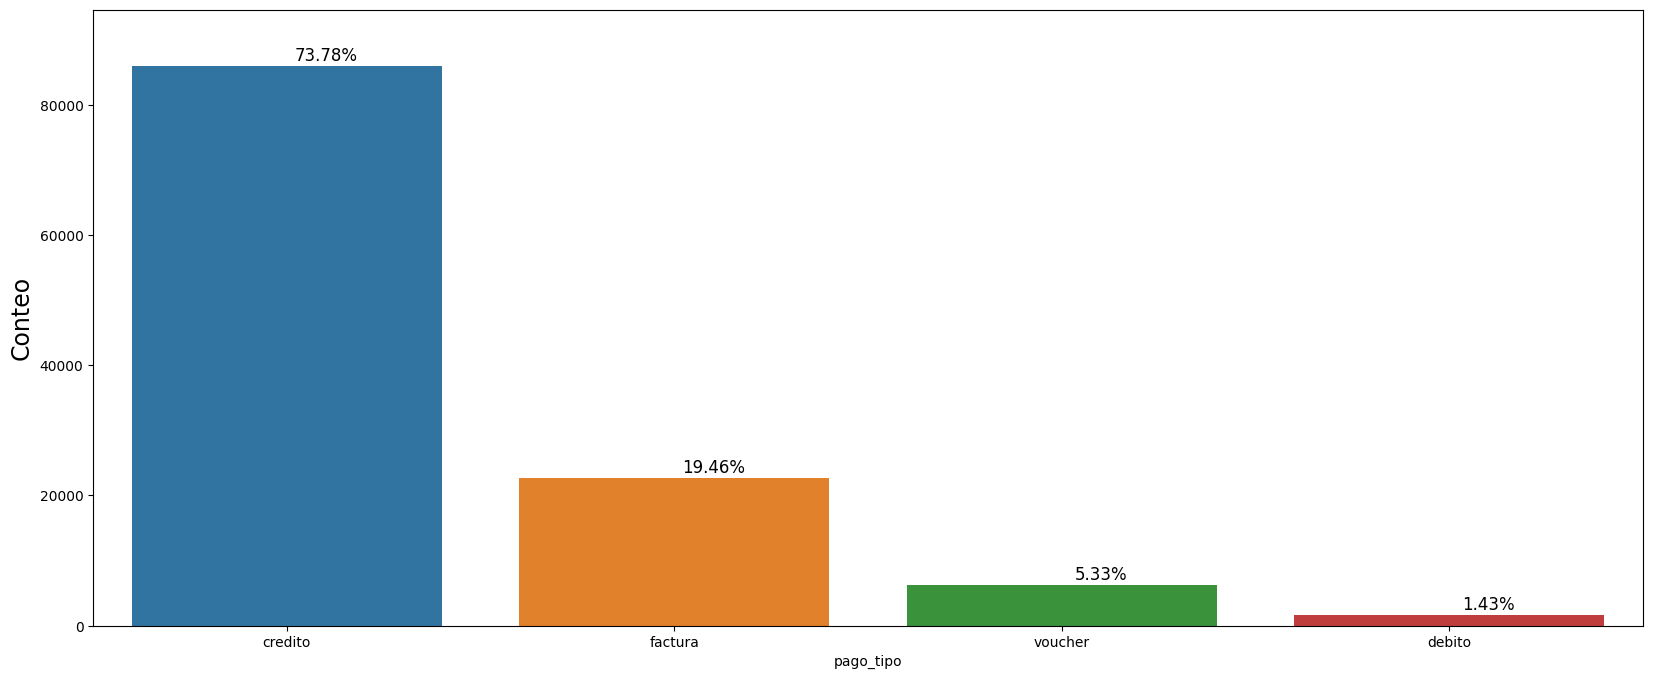

In [ ]:
plot_porcentajes('pago_tipo',datos_compras_clientes_df)

**Lo importante de esta sección:**

- Cuáles son las principales etapas en un problema de segmentación;
- Qué tipo de datos necesitamos obtener;
- Cómo el análisis exploratorio nos ayuda a identificar insights;
- Cómo añadir textos informativos a los gráficos.

## Aula 2

### 2.1 Modelo RFM

#### **Recencia (R)**
##### ¿Hace cuántos días fue la última compra que realizó este cliente?

#### **Frecuencia (F)**
##### ¿Cuántas compras este cliente hizo en tu empresa, desde que se registró?

#### **Valor Monetario (M)**
##### ¿Cuánto dinero este cliente ya gastó en tu empresa?

Cuando tenemos una base de datos con mucha información, es importante analizar qué es relevante. Además, debemos ser cuidadosos al añadir muchas variables para no aumentar innecesariamente la complejidad de nuestros modelos. Por este motivo, se hace necesaria la utilización del análisis exploratorio, con el propósito de obtener insights.



In [ ]:
# procederemos a seleccionar únicamente los atributos que nos permitirán resolver nuestro problema
df_olist = datos_compras_clientes_df [['id_unico_cliente','id_cliente','horario_pedido','item_id','precio']]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


Necesitamos también obtener la fecha máxima de compra para poder calcular la recencia. Crearemos entonces un dataframe llamado df_compra en el cual almacenaremos el id_unico_cliente y la fecha máxima de compra. Al final damos un head() para visualizar el nuevo dataframe

In [ ]:
df_compra = datos_compras_clientes_df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente','fecha_max_compra']
df_compra['fecha_max_compra'] = pd.to_datetime(df_compra['fecha_max_compra'])
df_compra.head()

,id_unico_cliente,fecha_max_compra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


Con el dataframe df_compra procedemos a crear un nuevo atributo llamado recencia en el cual almacenaremos la diferencia entre la última fecha de compra de cada cliente y la última fecha de compras referente a todo el dataset. Al final damos un head() para visualizar el nuevo dataframe

In [ ]:
df_compra['recencia'] = (df_compra['fecha_max_compra'].max() - df_compra['fecha_max_compra']).dt.days
df_compra.head()

,id_unico_cliente,fecha_max_compra,recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


Hemos creado el atributo referente a la recencia de las compras y ahora podemos juntar el df_compra con el df_olist en la columna id_unico_cliente. El dataframe resultante lo llamaremos df_usuario

In [ ]:
# ¿De los 5 primeros registros del dataframe, puedes identificar el cliente que compró más recientemente?
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente','recencia']], on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


### 2.2 Regla del codo para estimar el número de clusters

Ahora, necesitamos usar el Método del Codo, la idea es ejecutar el algoritmo KMeans para varias cantidades diferentes de clusters y así poder determinar el número ideal de clusters.

A medida que aumentamos el número de clusters con KMeans, las diferencias entre los diversos clusters disminuyen y las diferencias por dentro de los clusters van aumentando. Entonces, debemos hallar un equilibrio de modo que las observaciones que conforman cada agrupación sean lo más homogéneas posible y que las diversas agrupaciones se puedan diferenciar entre sí.

### 2.3 Codificando la Regla del Codo

Para iniciar con la clusterización, necesitamos establecer el número ideal de clusters para segmentar a nuestros clientes. Así, definiremos una función en la cual calcularemos la inercia para un número máximo de 10 clusters:

In [ ]:
from sklearn.cluster import KMeans

def calcular_inercia(datos):
  inercia = []
  for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X=datos)
    datos['clusters'] = kmeans.labels_
    inercia.append(kmeans.inertia_)
  return inercia

In [ ]:
df_recencia = df_usuario[['recencia']]


In [ ]:
# Procederemos a calcular la inercia para el dataframe df_recencia. El resultado lo almacenaremos en una variable llamada suma_cuadrados:
suma_cuadrados = calcular_inercia(df_recencia)

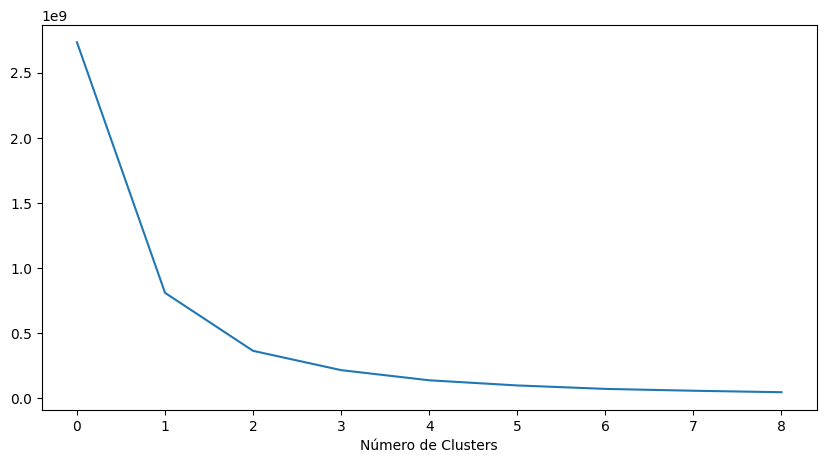

In [ ]:
# Graficaremos la inercia en función del número de clusters:
plt.figure(figsize=(10,5))
plt.plot(suma_cuadrados)
plt.xlabel('Número de Clusters')
plt.show()

### 2.4 Regla Matemática para estimar el número de clusters

¿Cómo podemos identificar si el mejor número de clusters es 3, 4 o 5?

¡Existe una solución matemática!



> ![](https://miro.medium.com/max/2775/1*9J7Wnh5L0eIcHXBeWlzvNA.png)


Lo primero que debemos hacer, es definir una recta conectando el primer punto (cluster 1) al último punto (cluster 9).

En este caso, P0 es el punto del cluster 1 y P1 es el punto del cluster 9. El par (x,y) representa las coordenadas de cualquier punto desde el cual deseemos  calcular la distancia hasta la recta. Calculando todas las distancias, lograremos determinar el punto que indica el número ideal de clusters.

### 2.5 Codificando la Regla Matemática

Ahora, debemos establecer matemáticamente el número ideal de clusters, y para ello desarrollaremos una función que nos permitirá calcular la distancia euclidiana entre el valor de la inercia para cada número de clusters y la recta que une el número mínimo y máximo de clusters propuesto para la resolución de nuestro problema.

In [ ]:
def numero_ideal_clusters(inercia):
  x1, y1 = 2, inercia[0]
  x2, y2 = 20, inercia[-1]

  distancia = []

  for i in range(len(inercia)):
    x0 = i+2
    y0 = inercia[i]
    numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominador = ((y2-y1)**2 + (x2-x1)**2)**(1/2)
    distancia.append(numerador/denominador)

  return distancia.index(max(distancia)) + 2

In [ ]:
print(f'El número ideal de clusters es: {numero_ideal_clusters(suma_cuadrados)}')

El número ideal de clusters es: 4


## Aula 3

### 3.1 Clusterizando la Recencia

Como en el aula anterior logramos establecer que el número ideal de clusters era de 4, entonces instanciaremos el algoritmo k-means para 4 clusters, y lo aplicaremos al df_recencia creando una nueva columna en df_usuario llamada recencia_cluster. Haremos un head() al df_usuario.

In [ ]:
kmeans = KMeans(n_clusters=4)
df_usuario['recencia_cluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,1
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,1
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,3


Realizaremos un groupby() por recencia_cluster calculando el promedio para ver si efectivamente la numeración asignada a cada cluster corresponde con el objetivo; es decir, queremos que los que compraron más recientemente pertenezcan al cluster de número más alto, o sea, 3, y los que compraron hace más tiempo, que hagan parte del cluster 0

In [ ]:
# ¿A qué cluster pertenecen los que compraron más recientemente?
agrupado_por_cluster = df_usuario.groupby('recencia_cluster')['recencia'].mean().reset_index()
agrupado_por_cluster.head()

,recencia_cluster,recencia
0,0,66.405850
1,1,318.687376
2,2,489.070832
3,3,187.076277


Si la respuesta a la pregunta anterior es 3 afortunadamente para nuestro caso esto era lo que queríamos, sin embargo, debes verificar que todos los demás clusters estén ordenados así: Los de valor más alto de recencia (quienes compraron hace más días) deben pertenecer al cluster 0e ir aumentando progresivamente hasta el cluster 3. Para garantizar este orden, debemos hacer un sort_values()

In [ ]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='recencia',ascending=False).reset_index(drop=True)
agrupado_por_cluster_ordenado.head()

,recencia_cluster,recencia
0,2,489.070832
1,1,318.687376
2,3,187.076277
3,0,66.405850


Ahora, notarás que los clusters quedaron ordenados con el número correcto del cluster de acuerdo con el índice, y debemos asignar el valor del índice a la columna recencia_cluster para poder realizar la modificación adecuada. Aunque existen varias formas de hacerlo, optaremos por crear un nuevo atributo con el índice index, eliminaremos la columna recencia_cluster y la columna index la renombraremos como recencia_cluster. De esta manera obtendremos el df_final

In [ ]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['recencia_cluster','index']],
                            on= 'recencia_cluster')
removiendo_datos = juntando_cluster.drop(['recencia_cluster'],axis=1)
df_final = removiendo_datos.rename(columns={'index':'recencia_cluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


Incluso, podemos pedir una muestra utilizando sample() para verificar otras filas y no solamente los 5 primeros registros: df_final.sample(3).

In [ ]:
# Como el paso a paso anterior lo debemos repetir para los clusters de frecuencia y de ingresos,
# lo más indicado es crear una función que reuna todos los pasos anteriores:
def ordenador_cluster(cluster_actual, target, df, asc=False):
  agrupado_por_cluster = df_usuario.groupby(cluster_actual)[target].mean().reset_index()
  agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target,ascending=asc).reset_index(drop=True)
  agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
  juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[[cluster_actual,'index']], on= cluster_actual)
  removiendo_datos = juntando_cluster.drop([cluster_actual],axis=1)
  df_final = removiendo_datos.rename(columns={'index':cluster_actual})
  return df_final

In [ ]:
# Probaremos la función ordenador_cluster() y haremos un groupby() utilizando la función describe() para validarla:
# ¿Cuál es el promedio de recencia para los que hacen parte del cluster 2?
df_usuario = ordenador_cluster('recencia_cluster','recencia',df_usuario)
df_usuario.groupby('recencia_cluster')['recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
recencia_cluster,,,,,,,,
0,20697.0,489.070832,59.862148,404.0,441.0,480.0,532.0,728.0
1,30695.0,318.687376,43.450070,253.0,281.0,312.0,355.0,403.0
2,33601.0,187.076277,35.024122,127.0,157.0,187.0,217.0,252.0
3,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0


  ### 3.2 Desafío: método de Silhouette para estimar el número de clusters

**Coeficiente de Silhouette:** Esta es una mejor métrica para decidir el número de clusters que serán formulados a partir de los datos. El coeficiente varía entre -1 y 1. Un valor cercano a 1 implica que la instancia está cercana al cluster y hace parte del cluster correcto. Por otro lado, un valor cercano a -1 significa que el valor está atribuído al cluster incorrecto.


Apliquemos este método para identificar el número ideal de clusters. Para ello, vamos a probar el siguiente código, en el cual el puntaje de Silhouette es empleado:



```
# Tiene formato de código
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df_recencia)
    score = silhouette_score(df_recencia, preds)
    print('Puntaje de Silhouette para ' + str(i) + ' clusters : ' + str(score))
```



Al ejecutar el código anterior, obtendrás diversos puntajes que pueden ser redefinidos. ¿Podrías describir y definir cuál es la mejor cantidad de clusters con base en estos puntajes?

**Lo importante de esta sección:**

- El modelo RFM (recencia, frecuencia e ingresos);
- Cómo funciona el algoritmo k-means;
- Cómo usar la regla del codo para definir el número de clusters;
- Cómo usar una regla matemática para confirmar el número ideal de clusters.

### 3.2 Clusterizando la Frecuencia

Procederemos en este paso a clusterizar la frecuencia. Para ello debemos obtener el conteo de los pedidos aprobados por cliente, y crear un nuevo dataframe llamado df_frecuencia:

In [ ]:
df_frecuencia = datos_compras_clientes_df.groupby('id_unico_cliente').pedido_aprobado.count().reset_index()
df_frecuencia.columns = ['id_unico_cliente','frecuencia']
df_frecuencia.head()

,id_unico_cliente,frecuencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


Haremos un merge() entre df_usuario y df_frecuencia, después volvemos a crear el df_frecuencia únicamente con la columna ’frecuencia’ e instanciamos k-means para df_frecuencia y lo almacenaremos en un nuevo atributo llamado ’frecuencia_cluster’ en df_usuario

In [ ]:
df_usuario = pd.merge(df_usuario,df_frecuencia, on='id_unico_cliente')
df_frecuencia = df_usuario[['frecuencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['frecuencia_cluster'] = kmeans.fit_predict(df_frecuencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,frecuencia,frecuencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


Aplicamos la función ordenador_cluster() con el parámetro asc=True para obtener el número de cluster ascendiente, es decir, mientras mayor la frecuencia, mayor el número del cluster al cual pertenece el cliente. Haremos un groupby() por ’frecuencia_cluster’ utilizando la función describe() para validar que los clusters (asignados a los clientes que compran con más frecuencia) correspondan:

In [ ]:
# ¿Cuál es el promedio de frecuencia de los clientes que compran más frecuentemente?
df_usuario = ordenador_cluster('frecuencia_cluster','frecuencia',df_usuario,asc=True)
df_usuario.groupby('frecuencia_cluster')['frecuencia'].describe()

,count,mean,std,min,25%,50%,75%,max
frecuencia_cluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


### 3.3 Clusterizando el Valor Monetario (Ingresos)

Vamos a calcular el valor total gastado para los clientes de la e-commerce e instanciar k-means con 4 clusters, además de aplicar la función ordenador_cluster() para la columna ’ingresos_cluster’.

In [ ]:
# ¿Cuál es el promedio de consumo de los clientes que están en el cluster 1?
df_ingresos = datos_compras_clientes_df.groupby('id_unico_cliente').pago_valor.sum().reset_index()
df_ingresos.columns = ['id_unico_cliente','ingresos']
df_usuario = pd.merge(df_usuario, df_ingresos,on='id_unico_cliente')
df_pago = df_usuario[['ingresos']]
kmeans = KMeans(n_clusters=4)
df_usuario['ingresos_cluster'] = kmeans.fit_predict(df_pago)
df_usuario = ordenador_cluster('ingresos_cluster','ingresos',df_usuario,asc=True)
df_usuario.groupby('ingresos_cluster')['ingresos'].describe()

,count,mean,std,min,25%,50%,75%,max
ingresos_cluster,,,,,,,,
0,114763.0,258.095126,364.892800,9.59,69.90,132.57,269.10,2950.16
1,1619.0,5650.053385,2881.999747,2951.83,3557.12,4491.44,6914.63,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


___

Al analizar el modelo RFM, percibimos que los clusters deben ser ordenados de acuerdo con la puntuación que van a ganar. Suponiendo que tu gestor haya resuelto añadir una nueva variable al modelo RFM, denominada “conversion”, esta variable está relacionada al número de veces que el cliente realizó una compra por el número de veces que él accedió a la página web durante los tres últimos meses. Para añadir esta variable en tu modelo, algunos cambios deberán ser realizados:

En la función ordenador_cluster(), debemos modificar la función sort_values(), añadiendo el comando ascending=True.

Como queremos que el mayor valor de la variable “conversión” tenga la mayor puntuación, la organización debe ser realizada de forma ascendente.

___

**Lo importante en esta sección:**

- Clusterizar los datos usando k-means;
- Ordenar los datos de forma que el número de cluster sirva como método de puntuación;
- Crear funciones de forma simplificada al segmentar las operaciones.

____

## Aula 4

### 4.1 Creando la puntuación

Vamos a crear un sistema de puntuación para nuestros clientes y así obtendremos de manera más objetiva los 4 segmentos de clientes para que el equipo de marketing o la gerencia de la empresa puedan apoyar sus decisiones estratégicas basados en estos resultados. Como no necesitaremos todo el dataset, entonces seleccionaremos únicamente las siguientes columnas:

In [ ]:
df_final = df_usuario[['id_unico_cliente','recencia','recencia_cluster','frecuencia','frecuencia_cluster','ingresos','ingresos_cluster']]
df_final.tail()

,id_unico_cliente,recencia,recencia_cluster,frecuencia,frecuencia_cluster,ingresos,ingresos_cluster
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3


In [ ]:
#Vamos a sumar el número de cluster para cada cliente para generar la puntuación, y tomamos una muestra de 5 registros:
df_final['puntuacion'] = df_usuario['recencia_cluster'] + df_usuario['frecuencia_cluster'] + df_usuario['ingresos_cluster']
df_final.sample(5)

,id_unico_cliente,recencia,recencia_cluster,frecuencia,frecuencia_cluster,ingresos,ingresos_cluster,puntuacion
21846,b8cc8bf5c9c45fefbcdffa0ba61001ee,293,1,1,0,42.27,0,1
55714,2dd284d70f7ac1572460a0a028464349,204,2,1,0,108.28,0,2
112775,d387ea85dc301a91740e31360d355686,97,3,4,1,2123.96,0,4
6325,5ad96d7a95788923e8ff455366a90015,442,0,2,0,626.18,0,0
84861,423f5b009686148ea66d352a321bb87e,57,3,1,0,84.70,0,3


In [ ]:
# Podemos ver el valor máximo de puntuación para nuestros clientes:
# ¿Cuál es la puntuación máxima de los clientes?
df_final.puntuacion.max()

7

Crearemos una nueva columna llamada ’segmento’ donde definiremos el segmento al cual pertenece cada cliente de acuerdo con su puntuación:

In [ ]:
df_final['segmento'] = 'inactivo'
df_final.loc[df_final['puntuacion']>=1, 'segmento'] = 'business'
df_final.loc[df_final['puntuacion']>=3, 'segmento'] = 'master'
df_final.loc[df_final['puntuacion']>=5, 'segmento'] = 'premium'

Ahora, podemos almacenar el resultado de nuestro análisis en un dataset que llamaremos RFM.csv y este servirá como referencia para futuros análisis.

In [ ]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/231127-1_clusterizacion_datos_segmentacion_clientes/datasets/RFM.csv')

### 4.2 Análisis visual de los resultados

Definiremos una función para realizar gráficos de dispersión para los diversos segmentos de clientes y comparar la recencia, frecuencia e ingresos para los mismos.

In [ ]:
def plot_segmento(x,y,datos):
  plt.figure(figsize=(10,6))
  sns.set(palette='muted',color_codes=True,style='whitegrid')
  sns.scatterplot(x=x, y=y, hue='segmento', data=datos, size='segmento',
                  sizes=(50,150), size_order=['premium','master','business','inactivo'])
  plt.show()

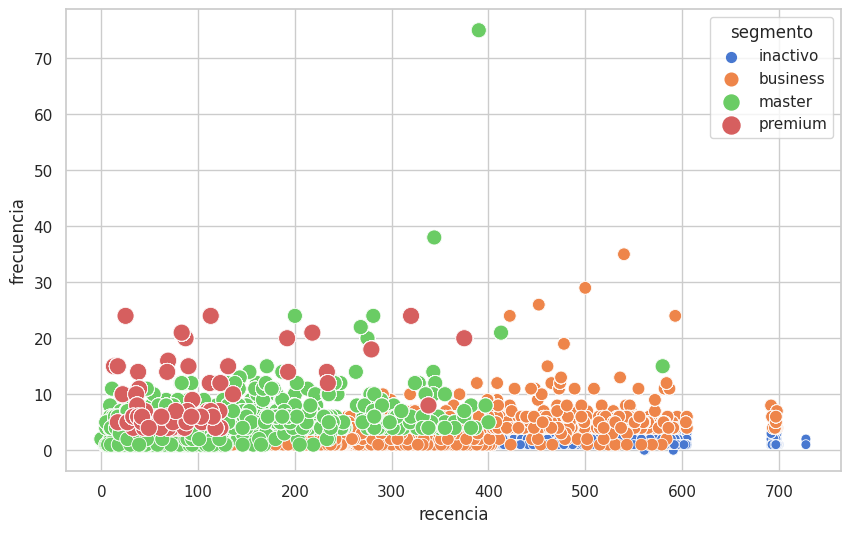

In [ ]:
# Procederemos a graficar la frecuencia contra la recencia:
plot_segmento('recencia','frecuencia',df_final)

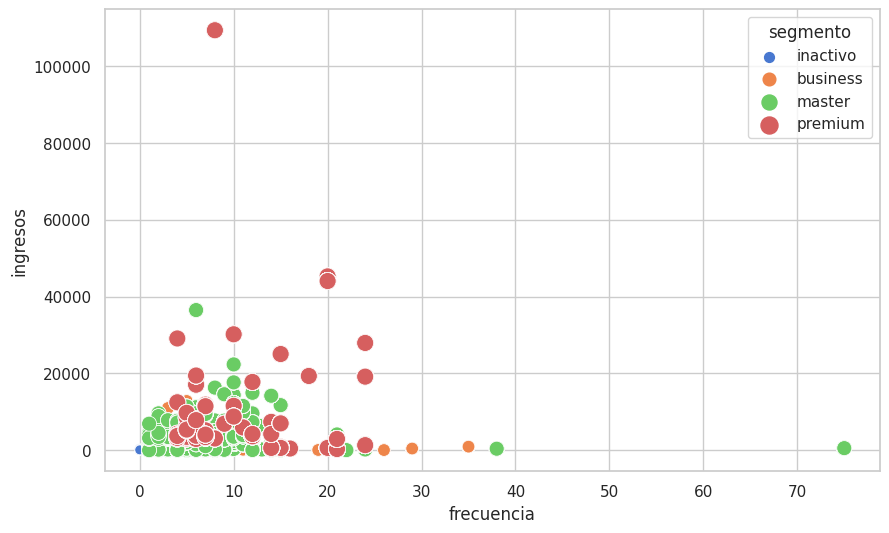

In [ ]:
# Graficaremos también los ingresos contra la frecuencia:
plot_segmento('frecuencia','ingresos',df_final)

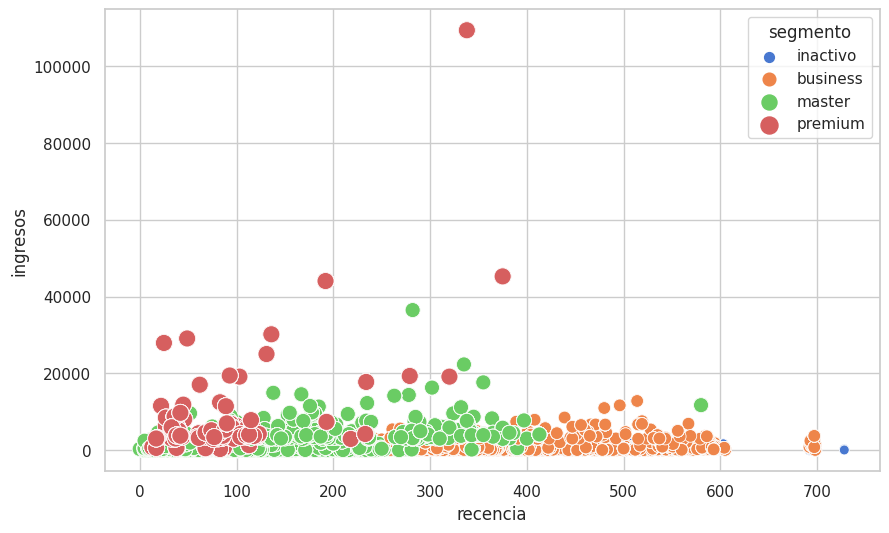

In [ ]:
# De igual manera graficaremos los ingresos contra la recencia
plot_segmento('recencia','ingresos',df_final)

```
# ¡¡¡Error en código - revisar !!!
# Finalmente graficaremos la distribución de clientes de acuerdo con el segmento al cual pertenecen:
# ¿En cuál segmento se encuentran más del 50% de los clientes?
sns.countplot(df_final['segmento'])
```



**Lo importante en esta sección:**

- Crear un modelo de puntuación con base en los clusters;
- Realizar visualizaciones utilizando gráficos de dispersión;
- Identificar el comportamiento de los clientes.

**Sección de presentación de informe a los stakeholdres:**

- Cómo podemos crear otras metodologías de puntuación;
- Cómo presentar el resultado del trabajo para otros equipos.